In [1]:
%%capture
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import rcParams

In [2]:
sns.set_style('whitegrid')
rcParams['figure.dpi'] = 150
rcParams['figure.figsize'] = (4, 3)
rcParams['grid.linewidth'] = 0.5
rcParams['grid.linestyle'] = 'dashed'
rcParams['legend.fancybox'] = False
rcParams['mathtext.fontset'] = 'stix'

# rcParams['axes.edgecolor'] = 'grey'
# rcParams['legend.edgecolor'] = 'grey'

hue_order = ["LMI", "KSG", "MINE", "InfoNCE"]
c6 = ['#c4bae2','#40ada6','#3c4ebf',  
        '#e3a600', '#edb1a3', '#d6543a',]
palette = [c6[c] for c in range(6) if c in [1,2,3,5]] + [c6[0]] + [c6[4]]

In [3]:
def letter_annotation(ax, xoffset, yoffset, letter):
     ax.text(xoffset, yoffset, letter, transform=ax.transAxes,
             size=12, weight='bold')

In [4]:
def sample_noisy_circle(N_samples, noise=0.25):

    angle = np.pi * np.random.uniform(0, 2, size=N_samples)
        
    x = np.cos(angle) + np.random.uniform(-noise, noise, size=N_samples)
    y = np.sin(angle) + np.random.uniform(-noise, noise, size=N_samples)
    
    return x, y

def sample_Gaussian_mixture(N_samples, cov_1=[[1, 0.5], [0.5, 1]], cov_2=[[1, -0.5], [-0.5, 1]]):
    sign = np.random.binomial(1, 0.5, size=N_samples)
    sign = np.tile(sign, (2, 1)).T
    pos = np.random.multivariate_normal([0,0], [[1, 0.9], [0.9, 1]], size=N_samples)
    neg = np.random.multivariate_normal([0,0], [[1, -0.9], [-0.9, 1]], size=N_samples)
    xy = sign*pos + (1-sign)*neg
    x = xy[:, 0]
    y = xy[:, 1]
    
    return x, y

In [5]:
df = pd.read_csv('A_symmetries.csv', index_col=0)

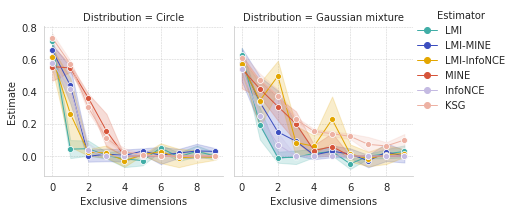

In [6]:
ax = sns.relplot(df, x='Exclusive dimensions', y='Estimate', hue='Estimator', col='Distribution', kind='line', 
                 height=3, err_style='band', linewidth=1, marker='o', palette=palette)

sns.move_legend(ax, "upper left", bbox_to_anchor=(0.8, 1))

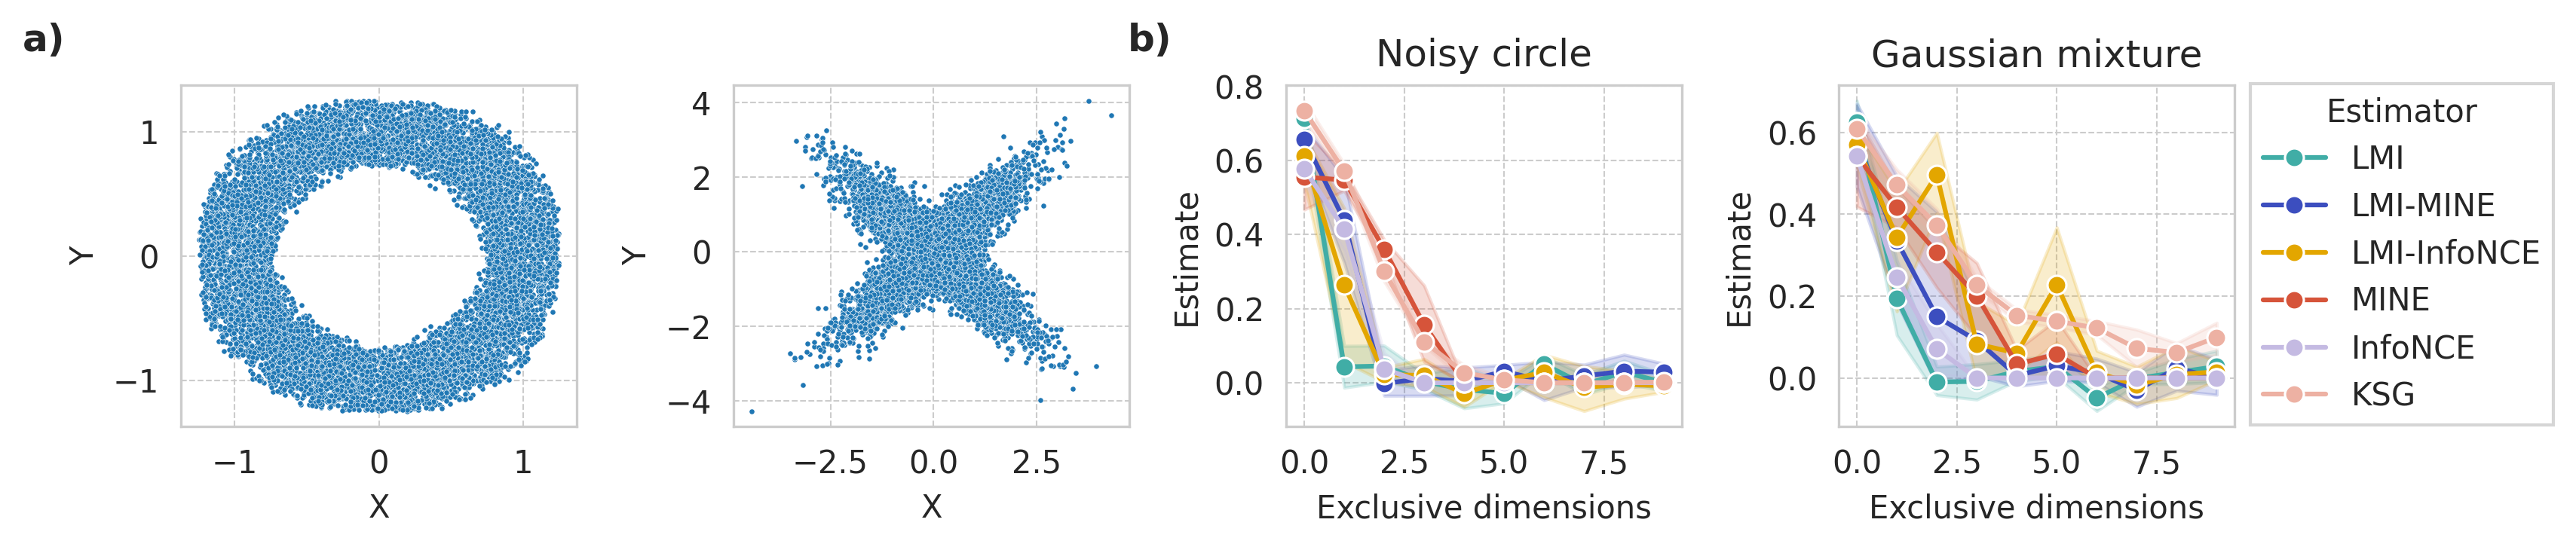

In [7]:
fig = plt.figure(figsize=(10, 2), dpi=300)

o, x, o_curve, x_curve, leg = fig.subfigures(1, 5, wspace=0.1,
                                  width_ratios= (1, 1, 1, 1, 0.1))

ax_o = o.subplots()
ax_x = x.subplots()
ax_o_curve = o_curve.subplots()
ax_x_curve = x_curve.subplots()

x, y = sample_noisy_circle(10**4)

sns.scatterplot(x=x, y=y, s=3, ax=ax_o)
ax_o.set_xlabel('X')
ax_o.set_ylabel('Y')

x, y = sample_Gaussian_mixture(10**4)

sns.scatterplot(x=x, y=y, s=3, ax=ax_x)
ax_x.set_xlabel('X')
ax_x.set_ylabel('Y')

sns.lineplot(df[df['Distribution'] == 'Circle'], x='Exclusive dimensions', y='Estimate', hue='Estimator', 
             ax=ax_o_curve, palette=palette, legend=False, marker='o')
ax_o_curve.set_title('Noisy circle')

sns.lineplot(df[df['Distribution'] == 'Gaussian mixture'], x='Exclusive dimensions', y='Estimate', hue='Estimator', 
             ax=ax_x_curve, palette=palette, legend=True, marker='o')
ax_x_curve.set_title('Gaussian mixture')

sns.move_legend(ax_x_curve, "upper left", bbox_to_anchor=(1, 1.05))

letter_annotation(ax_o, -.4, 1.1, "a)")
letter_annotation(ax_o_curve, -.4, 1.1, "b)")
# letter_annotation(ax_l, -.4, 1.1, "a)")